In [ ]:
import numpy as np  # Importing NumPy library for numerical operations
# وارد کردن کتابخانه NumPy برای عملیات‌های عددی

import matplotlib.pyplot as plt  # Importing Matplotlib's pyplot module for plotting graphs
# وارد کردن ماژول pyplot از کتابخانه Matplotlib برای رسم نمودارها

from PIL import Image  # Importing Image class from PIL (Python Imaging Library) to handle images
# وارد کردن کلاس Image از کتابخانه PIL برای کار با تصاویر


In [ ]:
from sys import getsizeof  # Importing getsizeof function to check memory size of objects
# وارد کردن تابع getsizeof برای بررسی اندازه حافظه اشیاء

img = plt.imread("./lena_color_512.tif")  # Reading the image file using Matplotlib
# خواندن فایل تصویر با استفاده از Matplotlib

print("shape of image:", img.shape)  # Printing the dimensions (height, width, channels) of the image
# چاپ ابعاد تصویر (ارتفاع، عرض، تعداد کانال‌ها)

print("type of elems of image:", img.dtype)  # Printing the data type of the image elements
# چاپ نوع داده عناصر تصویر

gray_img = img[:, :, 0]  # Extracting the first channel (Red) to create a grayscale image
# استخراج کانال اول (قرمز) برای ایجاد تصویر خاکستری

print("shape of grayscale image:", img.dtype)  # Printing the data type of the grayscale image elements
# چاپ نوع داده عناصر تصویر خاکستری

print("size of image:", getsizeof(img) / 1024 / 1024, "MB")  
# Printing the memory size of the original image in megabytes
# چاپ اندازه حافظه تصویر اصلی به مگابایت

print("size of grayscale image:", getsizeof(gray_img) / 1024 / 1024, "MB")  
# Printing the memory size of the grayscale image in megabytes
# چاپ اندازه حافظه تصویر خاکستری به مگابایت


shape of image: (512, 512, 3)
type of elems of image: uint8
shape of grayscale image: uint8
size of image: 0.0001373291015625 MB
size of grayscale image: 0.0001220703125 MB


In [ ]:
half_gray_img = gray_img[:, gray_img.shape[1] // 2:]  
# Extracting the right half of the grayscale image by selecting all rows and the second half of the columns
# استخراج نیمه‌ی راست تصویر خاکستری با انتخاب تمام ردیف‌ها و نیمه دوم ستون‌ها


In [ ]:
flipped_img = np.flip(half_gray_img, axis=0)  
# Flipping the right half of the grayscale image vertically (upside down) along the rows
# وارونه کردن نیمه‌ی راست تصویر خاکستری به صورت عمودی (بالا و پایین) بر اساس ردیف‌ها


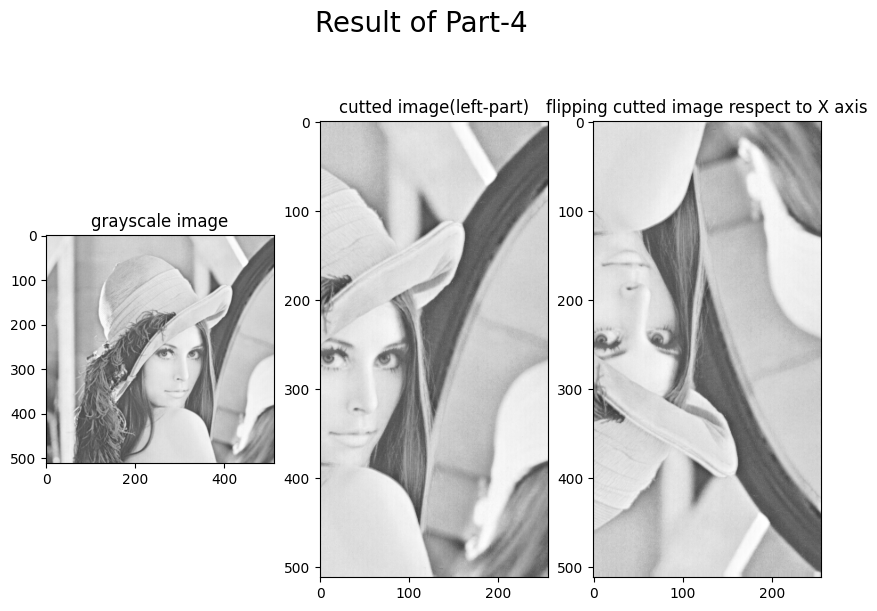

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 7))  
# Creating a figure with 1 row and 3 columns of subplots, setting the figure size to 10x7 inches
# ایجاد یک شکل با 1 ردیف و 3 ستون از زیرنمودارها و تعیین اندازه شکل به 10x7 اینچ

ax[0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)  
# Displaying the grayscale image in the first subplot with a gray colormap and pixel range 0-255
# نمایش تصویر خاکستری در زیرنمودار اول با نقشه رنگ خاکستری و محدوده پیکسل 0-255

ax[0].set_title("grayscale image")  
# Setting the title of the first subplot
# تعیین عنوان برای زیرنمودار اول

ax[1].imshow(half_gray_img, cmap="gray", vmin=0, vmax=255)  
# Displaying the right half of the grayscale image in the second subplot
# نمایش نیمه‌ی راست تصویر خاکستری در زیرنمودار دوم

ax[1].set_title("cutted image(left-part)")  
# Setting the title of the second subplot (note: description says left-part but actually it's right-half)
# تعیین عنوان برای زیرنمودار دوم (توجه: متن عنوان می‌گوید بخش چپ، اما در واقع نیمه راست است)

ax[2].imshow(flipped_img, cmap="gray", vmin=0, vmax=255)  
# Displaying the vertically flipped half-image in the third subplot
# نمایش نیمه تصویر وارونه شده عمودی در زیرنمودار سوم

ax[2].set_title("flipping cutted image respect to X axis")  
# Setting the title of the third subplot to indicate vertical flipping
# تعیین عنوان برای زیرنمودار سوم برای نشان دادن وارونه شدن عمودی

fig.suptitle("Result of Part-4", fontsize=20)  
# Setting the main title for the figure with font size 20
# تعیین عنوان اصلی برای شکل با اندازه فونت 20

plt.show()  
# Displaying all subplots
# نمایش همه زیرنمودارها


Read Dicom images

In [ ]:
import pydicom as dicom  # Importing pydicom library to work with DICOM medical image files
# وارد کردن کتابخانه pydicom برای کار با فایل‌های تصویری پزشکی DICOM

import cv2 as cv  # Importing OpenCV library for computer vision tasks
# وارد کردن کتابخانه OpenCV برای انجام عملیات بینایی کامپیوتری

from PIL import Image  # Importing Image class from PIL to handle images
# وارد کردن کلاس Image از کتابخانه PIL برای کار با تصاویر


In [ ]:
# read file
dc = dicom.dcmread("./IMG-0001-00001.dcm")  
# Reading a DICOM file and storing its data in the variable 'dc'
# خواندن یک فایل DICOM و ذخیره داده‌های آن در متغیر 'dc'


In [ ]:
dc.Modality  
# Accessing the Modality attribute of the DICOM file, which indicates the type of medical imaging (e.g., CT, MRI, X-ray)
# دسترسی به ویژگی Modality فایل DICOM که نوع تصویربرداری پزشکی را مشخص می‌کند (مثل CT، MRI، X-ray)


'MR'

In [ ]:
# answer:  
print(dc[("0028", "0100")])  
# Printing the value of the "Rows" tag (0028,0100) which shows the number of rows in the image
# چاپ مقدار تگ "Rows" (0028,0100) که تعداد ردیف‌های تصویر را نشان می‌دهد

print(dc[("0028", "0101")])  
# Printing the value of the "Columns" tag (0028,0101) which shows the number of columns in the image
# چاپ مقدار تگ "Columns" (0028,0101) که تعداد ستون‌های تصویر را نشان می‌دهد

print(dc[("0018", "0015")])  
# Printing the value of the "Body Part Examined" tag (0018,0015) which indicates which body part was scanned
# چاپ مقدار تگ "Body Part Examined" (0018,0015) که نشان می‌دهد کدام بخش بدن تصویربرداری شده است

# print(dc[("0008", "0016")])  
# (Commented out) This tag would show the "SOP Class UID" which identifies the type of DICOM object
# (کامنت شده) این تگ نوع شی DICOM را مشخص می‌کند (SOP Class UID)


(0028,0100) Bits Allocated                      US: 16
(0028,0101) Bits Stored                         US: 12
(0018,0015) Body Part Examined                  CS: 'BRAIN'


In [ ]:
image = dc.pixel_array  
# Extracting the pixel data from the DICOM file as a NumPy array
# استخراج داده‌های پیکسلی از فایل DICOM به صورت یک آرایه NumPy

print('maximum value in image is: ', image.max())  
# Printing the maximum pixel intensity value in the image
# چاپ بیشترین مقدار شدت پیکسل در تصویر

print('minimum value in image is: ', image.min())  
# Printing the minimum pixel intensity value in the image
# چاپ کمترین مقدار شدت پیکسل در تصویر


maximum value in image is:  1516
minimum value in image is:  0


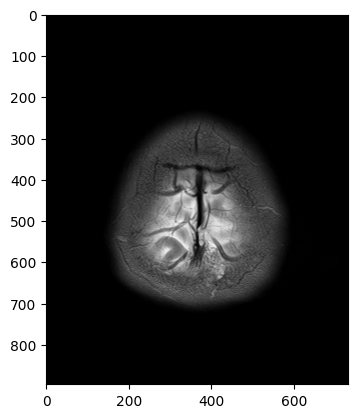

In [ ]:
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))  
# Normalizing the image pixel values to the range [0, 1] for proper display
# نرمال‌سازی مقادیر پیکسل تصویر به بازه [0, 1] برای نمایش صحیح

plt.imshow(normalized_image[0], cmap='gray')  
# Displaying the first frame/slice of the normalized image using a grayscale colormap
# نمایش اولین فریم/برش تصویر نرمال‌شده با استفاده از نقشه رنگ خاکستری

plt.show()  
# Showing the plotted image
# نمایش تصویر رسم‌شده
